---
# Density Functional Theory for H<sub>2</sub> Molecule
## Part 2 - Calculation of Total Energy
#### [C. N. Rangkuti ](https://quasi.id/team/staff/choi002.html) - [Research Center for Quantum Physics, BRIN, Indonesia](https://quantumresearch.id/)
---

This program is a simulation of calculations for different bond lengths and the recording of the resulting values for HF_1s, XA_1s, HF_1s_KS, and XA_1s_KS into CSV files. After running the simulation, it then prints tables displaying the values that were calculated. The code opens four CSV files in write mode for recording the results of each type of calculation.

In [1]:
import math
import numpy as np
import scipy as sp
from scipy.integrate import nquad

In [2]:
from datetime import datetime 
import os
import csv

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

The bond length values are specified, and lists to store the results for each type of calculation are initialized.

In [4]:
alpha = 1.24
bond_length = [0.5, 1.0, 1.4] #bond_length = np.linspace(0.5,3,26) # You can switch to spesific array for example: bond_length = [0.5, 1.0, 1.4]

These are the definition of the functions needed in this calculation. S(R), K(R), J(R), Jp(R), L(R), Kp(R), and int_exp_rab(R).

In [5]:
def S(R):

    w = alpha*R
    w2= w*w

    return math.exp(-w)*(1+w+w2/3)   

def Sp(R):

    w = alpha*R
    w2= w*w

    return math.exp(w)*(1-w+w2/3)

def J(R):
    
    w = alpha*R
    w2= w**2.0
    
    return -1/w+math.exp(-2*w)*(1+1/w)

def Jp(R):
    
    w = alpha*R
    w2= w*w
    
    return 1/w-math.exp(-2*w)*(1/w+11/8+3*w/4+w2/6)

def K(R):
    
    w = alpha*R
    w2= w**2.0
    
    return -math.exp(-w)*(1+w)

def Kp(R):
    
    w = alpha*R
    w2= w**2.0
    w3= w**3.0
    
    gamma = 0.577215665
    
    aa = 3.02E-01
    bb = -2.02E+00
    cc = 2.20E-01
    dd = -2.05E-02
    ee = 0.00E+00
    
    Eim2w = -math.exp(aa+bb*(2*w)+cc*(2*w)**2.0+dd*(2*w)**3.0+ee*(2*w)**4.0)
    Eim4w = -math.exp(aa+bb*(4*w)+cc*(4*w)**2.0+dd*(4*w)**3.0+ee*(4*w)**4.0)
    
    s  = math.exp(-w)*(1+w+w2/3)
    sp = math.exp(w)*(1-w+w2/3)
    s2 = s**2.0
    sp2= sp**2.0
    
    return 1/5*(-math.exp(-2*w)*(-25/8+23*w/4+3*w2+w3/3) \
              +6/w*(s2*(gamma+np.log(w))+sp2*Eim4w-2*s*sp*Eim2w))

def L(R):
    
    w = alpha*R
    w2= w*w
    
    return math.exp(-w)*(w+1/8+5/(16*w)) + math.exp(-3*w)*(-1/8-5/(16*w))

In [6]:
def int_exp_rab(R):

    integrand= lambda x,y,z: (np.exp(-alpha*np.sqrt(x**2+y**2+(z-R/2)**2))+np.exp(-alpha*np.sqrt(x**2+y**2+(z+R/2)**2)))**(8/3)

    return nquad(integrand, [[-np.inf, np.inf],[-np.inf, np.inf],[-np.inf, np.inf]])[0]

In [7]:
# Initialize empty lists to store HF_1s, XA_1s, HF_1s_KS, XA_1s_KS values
HF_1s_OUT = []
XA_1s_OUT = []
HF_1s_KS_OUT = []
XA_1s_KS_OUT = []

# Folder path
folder_path = 'csv'

# Check if the directory exists, if not, create it
if not os.path.exists(folder_path):
    os.makedirs(folder_path)

# Open the CSV files in write mode inside the 'csv' folder
with open(f'{folder_path}/HF_1s_OUT.csv', 'w', newline='') as fHF_1s, \
     open(f'{folder_path}/XA_1s_OUT.csv', 'w', newline='') as fXA_1s, \
     open(f'{folder_path}/HF_1s_KS_OUT.csv', 'w', newline='') as fHF_1s_KS, \
     open(f'{folder_path}/XA_1s_KS_OUT.csv', 'w', newline='') as fXA_1s_KS:
    # Your code to write to the files or perform other operations goes here


    # Create CSV writer objects
    HF_1s_writer = csv.writer(fHF_1s)
    XA_1s_writer = csv.writer(fXA_1s)
    HF_1s_KS_writer = csv.writer(fHF_1s_KS)
    XA_1s_KS_writer = csv.writer(fXA_1s_KS)

    # Write the headers to the CSV files    
    HF_1s_writer.writerow(['R', 'ET', 'EV', 'EJ', 'EX', 'EN', 'E_TOTAL'])
    XA_1s_writer.writerow(['R', 'ET', 'EV', 'EJ', 'EX', 'EN', 'E_TOTAL'])
    HF_1s_KS_writer.writerow(['R', 'E1_HF', 'mEJ', 'EN', 'E_TOTAL'])
    XA_1s_KS_writer.writerow(['R', 'E1_HF', 'mEJ', 'EN', 'E_TOTAL'])
    
    print(f"Starting calculation from R={bond_length[0]:.2f} to {bond_length[len(bond_length)-1]:.2f} Bohr .....")
    print('')

    # Loop to simulate your calculations for HF_1s, XA_1s, HF_1s_KS, XA_1s_KS
    for i in range(len(bond_length)):
        
        # Get the current datetime
        current_time = datetime.now()

        R = bond_length[i]
        
        print(f"Processing {i+1} of {len(bond_length)} ...")
        
        # For HF_1s values
        ET = 2*alpha**2.0/(2.0*(1+S(R)))*(1-2*K(R)-S(R))
        EV = 2*alpha/(1+S(R))*(-1+J(R)+2*K(R))
        EJ = 2*alpha/(2*(1+S(R))**2.0) * (5/8+Jp(R)+4*L(R)+2*Kp(R))
        EX_HF = 0#-(9/8)*(2/3)*((3/math.pi)**(1/3))*(((alpha**3)/(math.pi*(1+S(R))))**(4/3))*int_exp_rab(R)
        EN = 1/R
        E_TOT_HF = ET+EV+EJ+EX_HF+EN #Total electronic energy for HF_1s
        
        HF_1s = (R, ET, EV, EJ, EX_HF, EN, E_TOT_HF)
        HF_1s_OUT.append(HF_1s)
        HF_1s_writer.writerow([R, ET, EV, EJ, EX_HF, EN, E_TOT_HF])

        # For XA_1s values        
        EX_XA = EX_HF/(2/3)*0.7
        E_TOT_XA = ET+EV+EJ+EX_XA+EN #Total electronic energy for XA_1s

        XA_1s = (R, ET, EV, EJ, EX_XA, EN, E_TOT_XA)
        XA_1s_OUT.append(XA_1s)
        XA_1s_writer.writerow([R, ET, EV, EJ, EX_XA, EN, E_TOT_XA])

        # For HF_1s_KS values
        E1_HF = ET+EV+2*EJ+EX_HF
        mEJ = -EJ
        E_TOT_HF_KS = E1_HF+mEJ+EN #Total electronic energy for HF_1s_ks

        HF_1s_KS = (R, E1_HF, mEJ, EN, E_TOT_HF_KS)
        HF_1s_KS_OUT.append(HF_1s_KS)
        HF_1s_KS_writer.writerow([R, E1_HF, mEJ, EN, E_TOT_HF_KS])

        # For XA_1s_KS values
        E1_XA = ET+EV+2*EJ+EX_XA
        E_TOT_XA_KS = E1_XA+mEJ+EN #Total electronic energy for XA_1s_ks
        
        XA_1s_KS = (R, E1_XA, mEJ, EN, E_TOT_XA_KS)
        XA_1s_KS_OUT.append(XA_1s_KS)
        XA_1s_KS_writer.writerow([R, E1_XA, mEJ, EN, E_TOT_XA_KS])
        
        # Calculate the elapsed time 
        elapsed_time = datetime.now() - current_time

        # Calculate the hours, minutes, and seconds from the elapsed time
        hours = elapsed_time.seconds // 3600
        minutes = (elapsed_time.seconds // 60) % 60
        seconds = elapsed_time.seconds % 60

        # Format the elapsed time to display hours, minutes, and seconds without decimal places
        formatted_time = f"{hours:02}:{minutes:02}:{seconds:02}"
                
        print(f"{'>> completed':>32} (run time:{formatted_time})")
        print('')

    print(f"DONE.")
    print('')

Starting calculation from R=0.50 to 1.40 Bohr .....

Processing 1 of 3 ...
                    >> completed (run time:00:00:00)

Processing 2 of 3 ...
                    >> completed (run time:00:00:00)

Processing 3 of 3 ...
                    >> completed (run time:00:00:00)

DONE.



In [8]:
# Print separate tables for each variable
# Table for HF_1s values
print("Table Energy for HF_1s")
print(f"{'R':>10} {'ET':>10} {'EV':>10} {'EJ':>10} {'EX':>10} {'EN':>10} {'E_TOTAL':>10}")
for (R, ET, EV, EJ, EX_HF, EN, E_TOT_HF) in HF_1s_OUT:
    print(f"{R:>10.4f} {ET:>10.4f} {EV:>10.4f} {EJ:>10.4f} {EX_HF:>10.4f} {EN:>10.4f} {E_TOT_HF:>10.4f}")

# Table for XA_1s values
print("\nTable Energy for XA_1s")
print(f"{'R':>10} {'ET':>10} {'EV':>10} {'EJ':>10} {'EX':>10} {'EN':>10} {'E_TOTAL':>10}")
for (R, ET, EV, EJ, EX_XA, EN, E_TOT_XA) in XA_1s_OUT:
    print(f"{R:>10.4f} {ET:>10.4f} {EV:>10.4f} {EJ:>10.4f} {EX_XA:>10.4f} {EN:>10.4f} {E_TOT_XA:>10.4f}")

# Table for HF_1s_KS values
print("\nTable Energy for HF_1s_KS")
print(f"{'R':>10} {'E1_HF':>10} {'mEJ':>10} {'EN':>10} {'E_TOTAL':>10}")
for (R, E1_HF, mEJ, EN, E_TOT_HF_KS) in HF_1s_KS_OUT:
    print(f"{R:>10.4f} {E1_HF:>10.4f} {mEJ:>10.4f} {EN:>10.4f} {E_TOT_HF_KS:>10.4f}")

# Table for XA_1s_KS values
print("\nTable Energy for XA_1s_KS")
print(f"{'R':>10} {'E1_XA':>10} {'mEJ':>10} {'EN':>10} {'E_TOTAL':>10}")
for (R, E1_XA, mEJ, EN, E_TOT_XA_KS) in XA_1s_KS_OUT:
    print(f"{R:>10.4f} {E1_XA:>10.4f} {mEJ:>10.4f} {EN:>10.4f} {E_TOT_XA_KS:>10.4f}")

Table Energy for HF_1s
         R         ET         EV         EJ         EX         EN    E_TOTAL
    0.5000     1.4284    -4.6007     1.5145     0.0000     2.0000     0.3421
    1.0000     1.2837    -4.0745     1.4292     0.0000     1.0000    -0.3616
    1.4000     1.2095    -3.7239     1.3493     0.0000     0.7143    -0.4508

Table Energy for XA_1s
         R         ET         EV         EJ         EX         EN    E_TOTAL
    0.5000     1.4284    -4.6007     1.5145     0.0000     2.0000     0.3421
    1.0000     1.2837    -4.0745     1.4292     0.0000     1.0000    -0.3616
    1.4000     1.2095    -3.7239     1.3493     0.0000     0.7143    -0.4508

Table Energy for HF_1s_KS
         R      E1_HF        mEJ         EN    E_TOTAL
    0.5000    -0.1434    -1.5145     2.0000     0.3421
    1.0000     0.0676    -1.4292     1.0000    -0.3616
    1.4000     0.1842    -1.3493     0.7143    -0.4508

Table Energy for XA_1s_KS
         R      E1_XA        mEJ         EN    E_TOTAL
    0.50

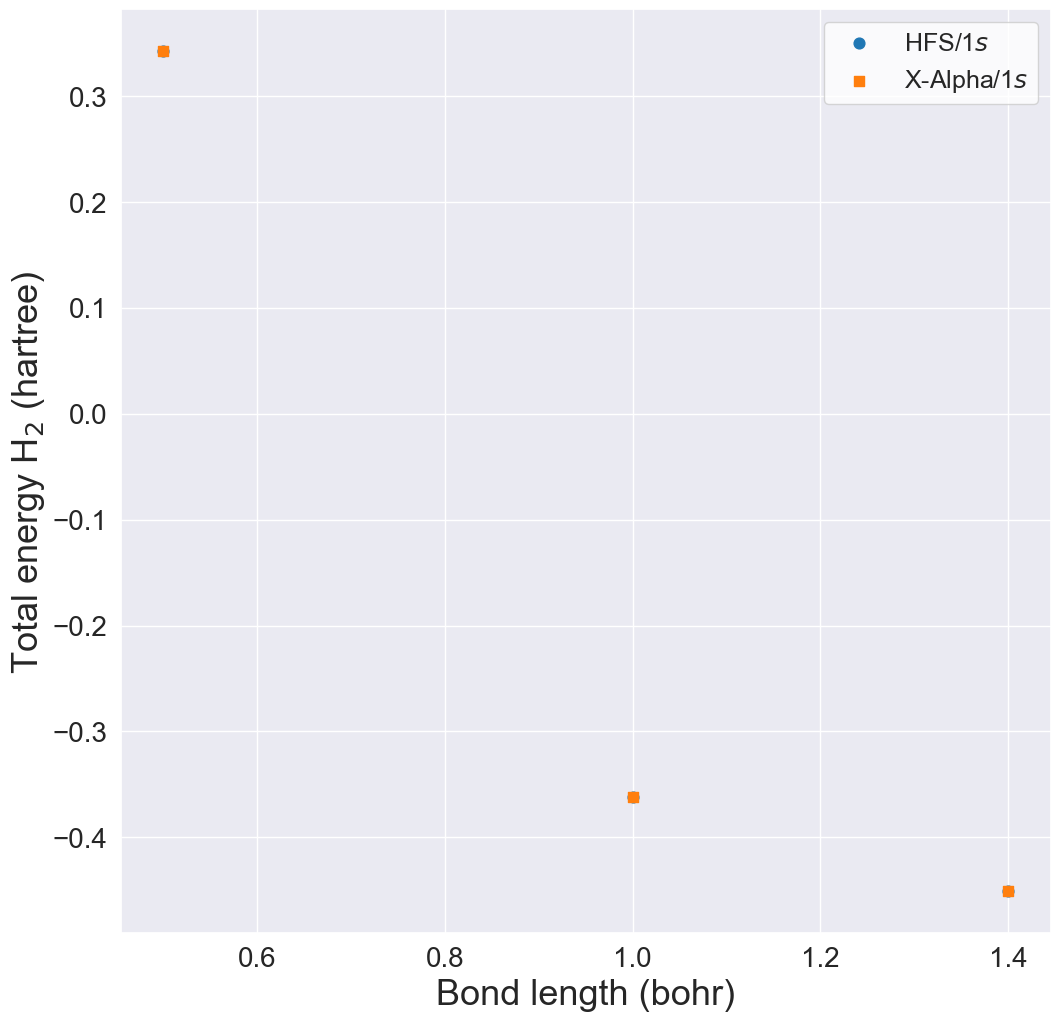

In [9]:
# Apply the default Seaborn theme
sns.set_theme()

# Get the Seaborn color palette
colors = sns.color_palette("tab10",10)

fig, ax = plt.subplots(figsize=(12, 12))

#ax.set(xlim=(0.3, 3.2), ylim=(-1.1,-0.2)) 

# Scatter plots with Seaborn colors and modified marker size
ax.scatter(bond_length, [x[-1] for x in HF_1s_OUT], color=colors[0], marker='o', s=60, label="HFS/1$s$")
ax.scatter(bond_length, [x[-1] for x in XA_1s_OUT], color=colors[1], marker='s', s=60, label="X-Alpha/1$s$")

ax.set_xlabel("Bond length (bohr)", fontsize=26)
ax.set_ylabel(r'Total energy H$_2$ (hartree)', fontsize=26)

# Add legend to the main plot with manually set location and white background
ax.legend(fontsize=18, facecolor='white')

plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

plt.show()
